<a href="https://colab.research.google.com/github/HandsomeJames0223/face_recognition/blob/main/face_recognition(109_10_29).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=96f0acc9e6953897939fc75a2e314ca5ba2c45184142914ee69538ad6637fec2
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


Jennie: [-0.08036965 -0.03011437  0.08951418 -0.10644367 -0.10375592 -0.07411121
 -0.11159728 -0.08982515  0.14662321 -0.14135753  0.19445755 -0.10584915
 -0.21073186 -0.01694736 -0.07491718  0.22268637 -0.12016174 -0.14397284
 -0.03994921  0.02388246  0.07102896  0.01483912 -0.01464932  0.04606513
 -0.08223341 -0.31965902 -0.15626787 -0.04636147 -0.07039212 -0.09397727
 -0.03456186  0.09965001 -0.18023753 -0.01668946  0.01086517  0.15656877
  0.06724276 -0.14614253  0.03119541 -0.01791184 -0.33199701 -0.02582615
  0.12569714  0.22187716  0.1363101   0.02010488  0.00328774 -0.10646471
  0.07170413 -0.15955129  0.00406305  0.04452228  0.08000657  0.05562451
  0.04161389 -0.16850993  0.12143784  0.0804304  -0.15653241 -0.03884139
  0.10272066 -0.08473144  0.07512838 -0.10969383  0.21091525  0.07857163
 -0.09835473 -0.18362761  0.09842636 -0.16631621 -0.05136032  0.08253399
 -0.19651565 -0.18245251 -0.40403655 -0.05894392  0.32668266  0.11927056
 -0.10293137  0.10770494  0.00399132  0.023

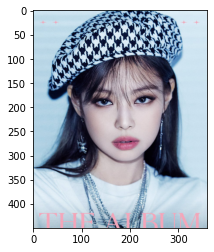

In [ ]:
import face_recognition
import matplotlib.pyplot as plt

img = face_recognition.load_image_file("Jennie.png")
en = face_recognition.face_encodings(img)[0]
print("Jennie:" , en)
plt.imshow(img)

In [ ]:
import glob
import os
formats = ["jpg", "png", "jpeg"]
fn = []
for f in formats:
    fn = fn + glob.glob("*.{}".format(f))
    fn = fn + glob.glob("*.{}".format(f.upper()))
encodings = []
names = []
for f in fn:
    try:
        img = face_recognition.load_image_file(f)
        en = face_recognition.face_encodings(img)[0]
        encodings.append(en)
        n = os.path.basename(f).split(".")[0]
        names.append(n)

    except IndexError:
        print(f, "找不到人臉")
print(names)

['Jennie', 'Tzuyu', 'Rose', 'Jisoo', 'Lisa']


In [ ]:
import cv2
import requests
headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36"
}
url = input("網址:")
response = requests.get(url, headers=headers, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)

locs = face_recognition.face_locations(img, model="cnn")
ens = face_recognition.face_encodings(img, known_face_locations=locs)

for en, loc in zip(ens, locs):
    (top, right, bottom, left) = loc
    cv2.rectangle(img, (left, top), (right, bottom), (255, 0, 0), 2)
    distances = face_recognition.face_distance(en, encodings)
    for na, dis in zip(names, distances):
        print(na, "的距離:", dis)
    print("最相近:", names[distances.argmin()])
    print("-" * 30)
    font = cv2.FONT_HERSHEY_DUPLEX
    d = str(round(min(distances), 2))
    cv2.putText(img, d, (left + 6, bottom - 6), font, 2, (255, 0, 0), 1)

plt.imshow(img)